In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

from society.agent import Agent, TrainableAgent
from society.simulations.weighted import WeightedNetworkSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.gameplay.tft import TitForTat
from society.strategies.gameplay.qlearning import TabularQLearningGameplayStrategy
from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (10, 6)

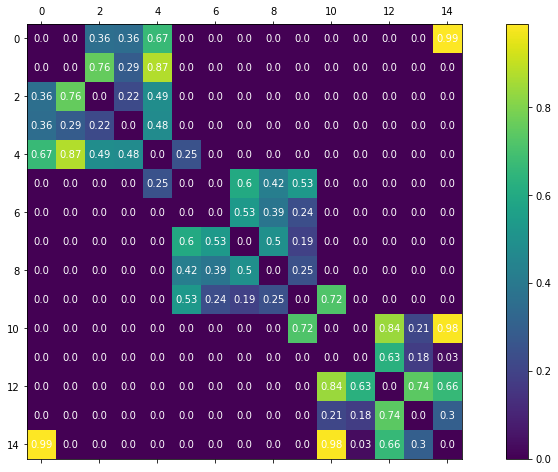

In [2]:
POPULATION = 15
agents = [
    Agent(None, TabularQLearningGameplayStrategy(), i, POPULATION)
    for i in range(POPULATION)
]

G = nx.connected_caveman_graph(3, 5)

weights_matrix = np.zeros((POPULATION, POPULATION))
for u, v, a in G.edges(data=True):
    weights_matrix[u, v] = weights_matrix[v, u] = random()

for u, v, d in G.edges(data=True):
    try:
        d["weight"] = weights_matrix[u, v]
    except:
        d["weight"] = 0

plot_matrix(weights_matrix, digits=2, figsize=(16, 8))

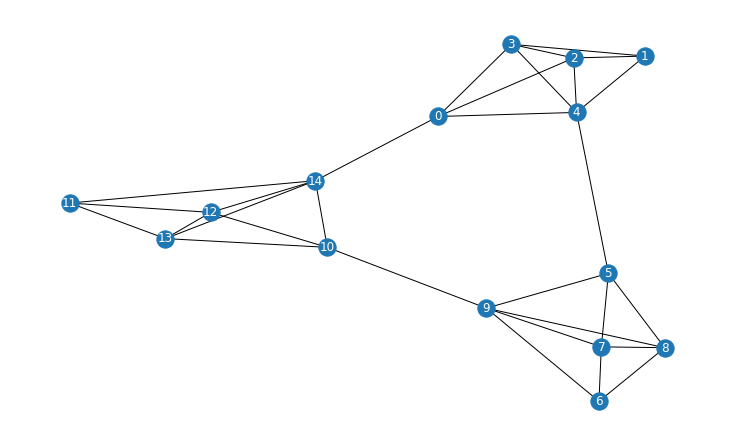

In [3]:
nx.draw(G, pos=nx.spring_layout(G), font_color="white", with_labels=True)

In [4]:
sim = WeightedNetworkSimulation(agents, weights_matrix)
sim.reset()

for i in range(10000):
    sim.play_round()


[(12, 59633), (0, 52496), (4, 52116), (10, 50933), (7, 50657), (8, 46105), (9, 44972), (5, 44743), (1, 44634), (14, 43442), (2, 39460), (6, 37429), (13, 34532), (3, 33759), (11, 28343)]


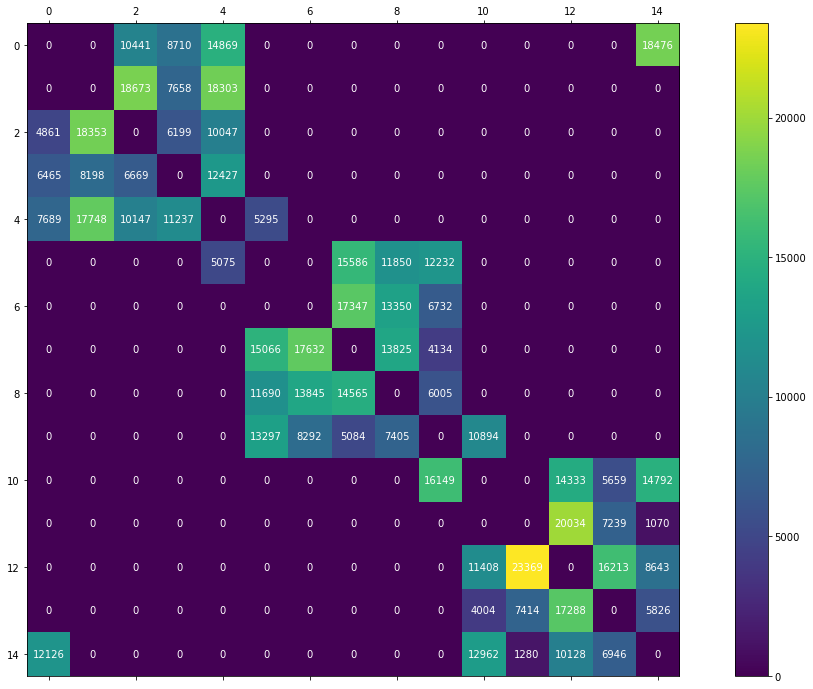

In [5]:
returns_matrix = [[sum(r) if len(r) > 0 else 0 for r in agent] for agent in sim.rewards]
ranked_partners = sorted([(i, sum(returns_matrix[i])) for i in range(POPULATION)], key=lambda x: x[1], reverse=True)
print(ranked_partners)

plot_matrix(returns_matrix, figsize=(20, 12))

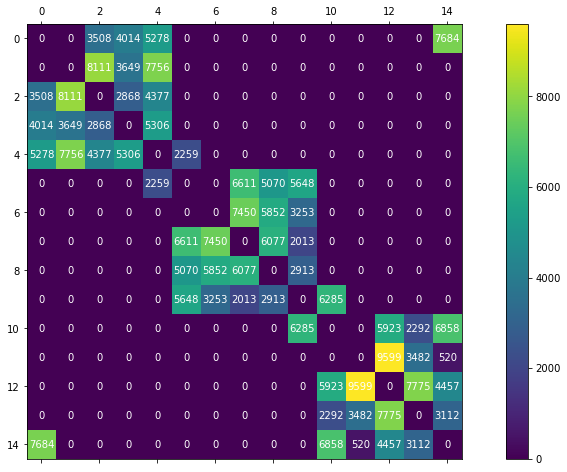

In [6]:
frequency_matrix = [[len(r) for r in agent] for agent in sim.rewards]

plot_matrix(frequency_matrix, figsize=(16, 8))

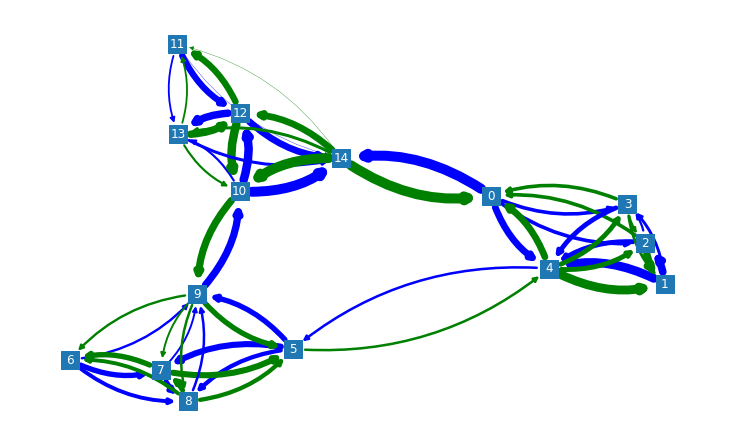

In [7]:
dg = nx.MultiDiGraph(G)

for u, v, d in G.edges(data=True):
    try:
        d["weight"] = returns_matrix[u][v]
    except:
        d["weight"] = 0

plot_graph_spring(dg)

In [8]:
nx.drawing.nx_pydot.write_dot(dg, "test1.dot")